In [2]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
df.head() #show first 5 rows

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.describe() #shows counts, min, max, interquartile ranges, etc.

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [5]:
df.Fare.mean() #show the mean of fare 

32.30542018038331

In [6]:
df.Survived.value_counts() #show how many people have survived and not survived

0    545
1    342
Name: Survived, dtype: int64

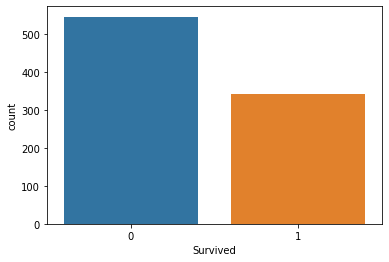

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot a graph visualizing suvived and not suvived people count
sns.countplot(x = 'Survived', data = df)

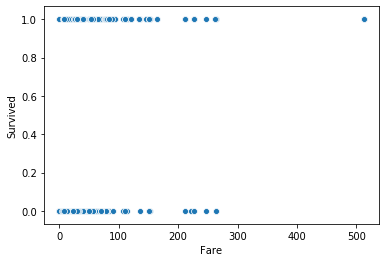

In [9]:
# Plot a scatter plot visualizing fare fee against survived people.
# We can see that for each fare range, there are both survived and not survived people. 
# We can also see that for fare more that 500, there are only survived people. 
sns.scatterplot(x = 'Fare', y = 'Survived', data = df)

In [94]:
import numpy as np
# Fare Bucket boundaries.
bins = np.array([0, 50, 100, 200, 300, 600])
buckets = [(bins[i], bins[i+1]) for i in range(len(bins) - 1)]
# Count how many people belong to each fare bucket.
all_on_board = (np.histogram(df.Fare, bins))
print(all_on_board)
# Count how many people survived in each fare bucket.
survived = (np.histogram(df[df['Survived'] == 1].Fare, bins))
print(survived)
# Calculate the survival rate in each fare bucket.
survival_rate = survived[0] / all_on_board[0]
# Generate the dataframe using fare buckets and survival rates.
survival_data_bar = np.transpose(np.array([all_on_board[0], survived[0], survival_rate, buckets]))
survival_rate_bar_df = pd.DataFrame(data=survival_data_bar, columns=["all_on_board", "survived", "survival_rate", "fare_bucket"])
print(survival_rate_bar_df)
survival_data_line = np.transpose(np.array([all_on_board[0], survived[0], survival_rate, bins[1:]]))
survival_rate_line_df = pd.DataFrame(data=survival_data_line, columns=["all_on_board", "survived", "survival_rate", "fare"])
print(survival_rate_line_df)

(array([726, 108,  33,  17,   3]), array([  0,  50, 100, 200, 300, 600]))
(array([233,  70,  25,  11,   3]), array([  0,  50, 100, 200, 300, 600]))
  all_on_board survived survival_rate fare_bucket
0          726      233      0.320937     (0, 50)
1          108       70      0.648148   (50, 100)
2           33       25      0.757576  (100, 200)
3           17       11      0.647059  (200, 300)
4            3        3             1  (300, 600)
   all_on_board  survived  survival_rate   fare
0         726.0     233.0       0.320937   50.0
1         108.0      70.0       0.648148  100.0
2          33.0      25.0       0.757576  200.0
3          17.0      11.0       0.647059  300.0
4           3.0       3.0       1.000000  600.0


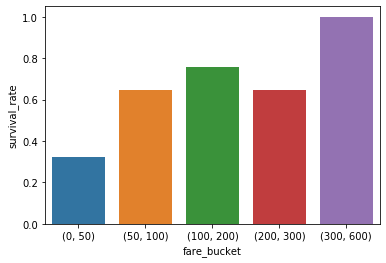

In [92]:
# Now let's first plot a bar graph visulizaing the survival rates against the fare buckets we defined.
# we can clearly see that, generally the survival rate increases as the fare increases. 
# In particularly, when the fare is below 50, the survival rate is only 30%, 
# while when the fare is above 300, the survival rate is 100%.
# But the suvival rate between fare 200 to 300 is a little lower than the surival rate between fare 100 to 200.
sns.barplot(x = 'fare_bucket', y = 'survival_rate', data = survival_rate_bar_df)


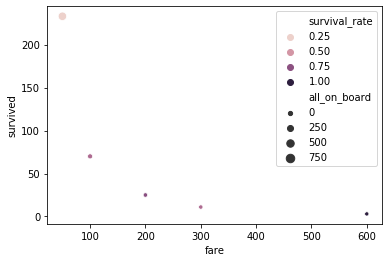

In [101]:
# We can also plot a scatter plot to visualize the survival data as below.
# We use fare as the X axis and the number of survivals in the fare bucket as the Y axis.
# The point color is associated with survival_rate where darker color indiciates higher survial rate.
# The point size is associated with all_on_board where bigger point means more people were on board.
# We can see that there are more people on board with low fare but the survival rate is lower,
# in contrast there are fewer people on board with high fare but the survival rate is higher. 
sns.scatterplot(x = 'fare', y = 'survived', hue='survival_rate', size='all_on_board', data = survival_rate_line_df)
